### **LOAD DATA**

In [431]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [432]:
from google.colab import files
data_to_load = files.upload()

Saving gdpgr_transform.csv to gdpgr_transform (1).csv


In [433]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# data setup
import io
df = pd.read_csv(io.BytesIO(data_to_load['gdpgr_transform.csv']),parse_dates=["DATE"])
df.head()

,DATE,ALRCB,CIC,CPI,CRUDEBRUSD,EXSITC0,EXSITC1,EXSITC2,EXSITC3,EXSITC4,...,SERVTAX,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDPGR
0,2005-02-01,-0.496013,0.506290,0.115532,7.105116,-8.982409,-35.626410,-13.418091,-9.683886,-15.344619,...,1072.327616,2.533110,149.517363,-17.701760,-3.379075,9.602007,-27.436272,-5.971614,-131.304269,7.382329
1,2005-03-01,-0.832118,0.629279,0.000000,6.814327,26.095991,24.717612,27.704550,23.630549,28.116789,...,-110.186853,2.396097,-254.109670,4.967788,-60.210891,-0.258410,-148.314279,-289.289787,1499.011031,5.124904
2,2005-04-01,1.163063,-0.377092,0.230665,-10.815266,-10.370720,15.463698,-1.990960,-3.424526,-11.656922,...,-669.817472,-3.068073,-41.481822,4.035003,-424.310825,3.974763,178.927415,296.182847,-207.845968,6.764701
3,2005-05-01,-0.496823,-0.505011,0.803164,4.425080,2.191055,-20.406791,-8.173208,-8.448781,14.356938,...,615.991687,4.636498,32.267903,11.362740,463.638297,-3.507468,-27.796838,-6.128699,-1333.390786,7.149748
4,2005-06-01,-0.666240,0.378997,0.114213,8.355977,2.529714,19.846849,6.129793,-0.539864,-0.014975,...,-204.344070,1.908231,450.842703,98.238680,-93.890020,-0.817970,-61.467351,-227.547434,1554.368247,4.964823


In [434]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base import  datetools


In [435]:
df = pd.read_csv("gdpgr_transform.csv", index_col=0, parse_dates=[0])
df.head()

,ALRCB,CIC,CPI,CRUDEBRUSD,EXSITC0,EXSITC1,EXSITC2,EXSITC3,EXSITC4,EXSITC5,...,SERVTAX,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDPGR
DATE,,,,,,,,,,,,,,,,,,,,,
2005-02-01,-0.496013,0.506290,0.115532,7.105116,-8.982409,-35.626410,-13.418091,-9.683886,-15.344619,1.266593,...,1072.327616,2.533110,149.517363,-17.701760,-3.379075,9.602007,-27.436272,-5.971614,-131.304269,7.382329
2005-03-01,-0.832118,0.629279,0.000000,6.814327,26.095991,24.717612,27.704550,23.630549,28.116789,17.172810,...,-110.186853,2.396097,-254.109670,4.967788,-60.210891,-0.258410,-148.314279,-289.289787,1499.011031,5.124904
2005-04-01,1.163063,-0.377092,0.230665,-10.815266,-10.370720,15.463698,-1.990960,-3.424526,-11.656922,-5.435797,...,-669.817472,-3.068073,-41.481822,4.035003,-424.310825,3.974763,178.927415,296.182847,-207.845968,6.764701
2005-05-01,-0.496823,-0.505011,0.803164,4.425080,2.191055,-20.406791,-8.173208,-8.448781,14.356938,-10.448526,...,615.991687,4.636498,32.267903,11.362740,463.638297,-3.507468,-27.796838,-6.128699,-1333.390786,7.149748
2005-06-01,-0.666240,0.378997,0.114213,8.355977,2.529714,19.846849,6.129793,-0.539864,-0.014975,-7.175456,...,-204.344070,1.908231,450.842703,98.238680,-93.890020,-0.817970,-61.467351,-227.547434,1554.368247,4.964823


### **SETTING FINAL GDPGR FORECAST**

In [436]:
df2 = pd.read_csv(io.BytesIO(data_to_load['gdpgr_transform.csv']),parse_dates=["DATE"])
df2.head()

,DATE,ALRCB,CIC,CPI,CRUDEBRUSD,EXSITC0,EXSITC1,EXSITC2,EXSITC3,EXSITC4,...,SERVTAX,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDPGR
0,2005-02-01,-0.496013,0.506290,0.115532,7.105116,-8.982409,-35.626410,-13.418091,-9.683886,-15.344619,...,1072.327616,2.533110,149.517363,-17.701760,-3.379075,9.602007,-27.436272,-5.971614,-131.304269,7.382329
1,2005-03-01,-0.832118,0.629279,0.000000,6.814327,26.095991,24.717612,27.704550,23.630549,28.116789,...,-110.186853,2.396097,-254.109670,4.967788,-60.210891,-0.258410,-148.314279,-289.289787,1499.011031,5.124904
2,2005-04-01,1.163063,-0.377092,0.230665,-10.815266,-10.370720,15.463698,-1.990960,-3.424526,-11.656922,...,-669.817472,-3.068073,-41.481822,4.035003,-424.310825,3.974763,178.927415,296.182847,-207.845968,6.764701
3,2005-05-01,-0.496823,-0.505011,0.803164,4.425080,2.191055,-20.406791,-8.173208,-8.448781,14.356938,...,615.991687,4.636498,32.267903,11.362740,463.638297,-3.507468,-27.796838,-6.128699,-1333.390786,7.149748
4,2005-06-01,-0.666240,0.378997,0.114213,8.355977,2.529714,19.846849,6.129793,-0.539864,-0.014975,...,-204.344070,1.908231,450.842703,98.238680,-93.890020,-0.817970,-61.467351,-227.547434,1554.368247,4.964823


In [437]:
#convert columns to datetime and then to month period
df2['DATE'] = pd.to_datetime(df2['DATE']).dt.to_period('M')
df_series = df2.set_index('DATE').asfreq('M')
df_series

,ALRCB,CIC,CPI,CRUDEBRUSD,EXSITC0,EXSITC1,EXSITC2,EXSITC3,EXSITC4,EXSITC5,...,SERVTAX,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDPGR
DATE,,,,,,,,,,,,,,,,,,,,,
2005-02,-0.496013,0.506290,0.115532,7.105116,-8.982409,-35.626410,-13.418091,-9.683886,-15.344619,1.266593,...,1072.327616,2.533110,149.517363,-17.701760,-3.379075,9.602007,-27.436272,-5.971614,-131.304269,7.382329
2005-03,-0.832118,0.629279,0.000000,6.814327,26.095991,24.717612,27.704550,23.630549,28.116789,17.172810,...,-110.186853,2.396097,-254.109670,4.967788,-60.210891,-0.258410,-148.314279,-289.289787,1499.011031,5.124904
2005-04,1.163063,-0.377092,0.230665,-10.815266,-10.370720,15.463698,-1.990960,-3.424526,-11.656922,-5.435797,...,-669.817472,-3.068073,-41.481822,4.035003,-424.310825,3.974763,178.927415,296.182847,-207.845968,6.764701
2005-05,-0.496823,-0.505011,0.803164,4.425080,2.191055,-20.406791,-8.173208,-8.448781,14.356938,-10.448526,...,615.991687,4.636498,32.267903,11.362740,463.638297,-3.507468,-27.796838,-6.128699,-1333.390786,7.149748
2005-06,-0.666240,0.378997,0.114213,8.355977,2.529714,19.846849,6.129793,-0.539864,-0.014975,-7.175456,...,-204.344070,1.908231,450.842703,98.238680,-93.890020,-0.817970,-61.467351,-227.547434,1554.368247,4.964823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08,-0.882352,4.151355,0.000000,-7.654788,3.273904,40.800302,32.518756,-18.495145,-17.721047,1.311638,...,-808.069666,-157.614245,-9.716186,-3.313453,-84.232288,-2.247295,173.911842,20.608802,53.342269,2.122863
2021-09,1.418221,3.808101,0.244590,9.104542,-0.024730,-7.964619,7.132654,7.411555,31.636792,4.607670,...,36.218804,-50.993286,-51.712896,-10.205432,266.365354,22.547269,-113.041987,71.493638,-5.439545,-4.500000
2021-10,-0.905884,0.797492,0.730202,10.778796,6.926265,12.885096,-6.670146,6.363435,-5.511146,7.775388,...,501.973060,55.056507,-35.394406,21.963524,106.395302,97.051045,105.252398,-72.581716,19.289049,1.625791


In [438]:
# Final Target Variable Dataset
df_series = df2.set_index('DATE').asfreq('M')
series = pd.DataFrame(df_series['GDPGR'], index= df_series.index)
target_final = series.iloc[:,]
target_final.tail(5)

,GDPGR
DATE,
2021-08,2.122863
2021-09,-4.500000
2021-10,1.625791
2021-11,1.019373
2021-12,3.600000


In [439]:
# Holt Winter’s Exponential Smoothing or Triple Smoothing
# fit model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(series, trend = 'add',  seasonal_periods=None)
model_fit = model.fit()
# make prediction
GDPGR_Forecast = pd.DataFrame(model_fit.forecast(steps=10))
GDPGR_Forecast.columns = ['Holts-Winter Forecast']
GDPGR_Forecast

,Holts-Winter Forecast
2022-01,1.923483
2022-02,1.899956
2022-03,1.876429
2022-04,1.852902
2022-05,1.829375
2022-06,1.805848
2022-07,1.782321
2022-08,1.758794
2022-09,1.735267
2022-10,1.711740


### **SET UP TRAIN-TEST**

In [440]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [441]:
# making new data frame with dropped NA values 
df =df.dropna(axis = 0, how ='any') 

In [442]:
#train_size = int(df.shape[0]*0.96)
#test_size = int(df.shape[0]*0.955)


#X_train = df[:train_size].drop("GDPGR", axis=1)
#X_test = df[test_size:].drop("GDPGR", axis=1)

#y_train = df[:train_size]["GDPGR"]
#y_test = df[test_size:]["GDPGR"]

#X_train.shape, X_test.shape

In [443]:
train_size = int(df.shape[0]*0.9)
test_size = int(df.shape[0]*0.95)

X_train = df[:train_size].drop("GDPGR", axis=1)
X_test = df[train_size:test_size].drop("GDPGR", axis=1)
X_val = df[test_size:].drop("GDPGR", axis=1)

y_train = df[:train_size]["GDPGR"]
y_test = df[train_size:test_size]["GDPGR"]
y_val = df[test_size:]["GDPGR"]

X_train.shape, X_test.shape, X_val.shape

((182, 45), (10, 45), (11, 45))

### **Auto Regressive (AR)**

In [444]:
df['GDPGR'][:len(df)-100]

DATE
2005-02-01    7.382329
2005-03-01    5.124904
2005-04-01    6.764701
2005-05-01    7.149748
2005-06-01    4.964823
                ...   
2013-04-01    4.775936
2013-05-01    4.526361
2013-06-01    4.555885
2013-07-01    4.124987
2013-08-01    4.630298
Name: GDPGR, Length: 103, dtype: float64

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


                            AutoReg Model Results                             
Dep. Variable:                  GDPGR   No. Observations:                  103
Model:                     AutoReg(8)   Log Likelihood                -138.643
Method:               Conditional MLE   S.D. of innovations              1.041
Date:                Mon, 27 Jun 2022   AIC                            297.286
Time:                        08:41:24   BIC                            322.825
Sample:                    10-01-2005   HQIC                           307.606
                         - 08-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7085      0.616      2.772      0.006       0.500       2.917
GDPGR.L1      -0.0256      0.102     -0.251      0.802      -0.226       0.174
GDPGR.L2       0.0708      0.102      0.693      0.4

,AR Model Forecast
2022-01,4.894025
2022-02,4.270126
2022-03,4.898054
2022-04,5.269738
2022-05,4.714231


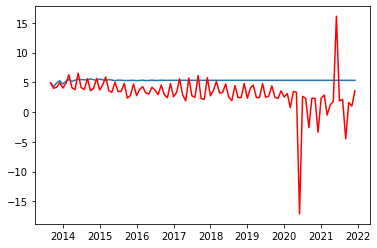

In [453]:
from statsmodels.tsa.ar_model import AutoReg

#Create training and test data
train_data = df['GDPGR'][:len(df)-100]
test_data = df['GDPGR'][len(df)-100:]

# Instantiate and fit the AR model with training data
ar_model = AutoReg(train_data, lags=8).fit()

# Print Summary
print(ar_model.summary())

# Make the predictions
pred_ar = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

# Plot the prediction vs test data

from matplotlib import pyplot
pyplot.plot(pred_ar)
pyplot.plot(test_data, color='red')

rmse = np.sqrt(mean_squared_error(pred_ar, test_data))
print(f"RMSE Score = {rmse}")

ar = pd.DataFrame({'AR Model Forecast': pred_ar[:10]})
ar.index = GDPGR_Forecast.index
ar.head(5)


### **SARIMA**

In [446]:
import pmdarima as pm
target = df[['GDPGR']]
# fitting a stepwise model to find the best paramters for SARIMA:
stepwise_fit = pm.auto_arima(target, start_p=1, start_q=1, max_p=3, max_d=2,max_q=3,m=7,
                             start_P=0,start_Q=0,max_P=3, max_D=3,max_Q=3, seasonal=True, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1081.865, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1027.807, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1079.871, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1026.274, Time=0.07 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=1027.904, Time=0.12 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=944.351, Time=0.07 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=946.188, Time=0.19 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : AIC=946.209, Time=0.17 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(3,1,0)(0,0,0)[7] intercept   : AIC=941.113, Time=0.10 sec
 ARIMA(3,1,0)(1,0,0)[7] intercept   : AIC=941.210, Time=0.26 sec
 ARIMA(3,1,0)(0,0,1)[7] intercept   : AIC=941.479, Time=0.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  203
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -456.211
Date:                Mon, 27 Jun 2022   AIC                            922.421
Time:                        08:35:35   BIC                            938.963
Sample:                             0   HQIC                           929.114
                                - 203                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0552      0.267     -0.206      0.836      -0.579       0.469
ar.L2         -0.0543      0.226     -0.240      0.810      -0.497       0.388
ar.L3          0.3225      0.033      9.742      0.000       0.258       0.387
ma.L1         -0.9354      0.026    -36.420      0.000      -0.986      -0.885
sigma2         5.3060      0.124     42.828      0.000       5.063       5.549
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             11711.64
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -2.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [454]:
# SARIMA 

# Using parameters automatically based on grid serach
SARIMA_Forecast = pd.DataFrame(stepwise_fit.predict(n_periods= 10))
SARIMA_Forecast.columns = ['SARIMA_Forecast']
SARIMA_Forecast.index = GDPGR_Forecast.index
rmse = np.sqrt(mean_squared_error(SARIMA_Forecast, y_test))
print(f"RMSE Score = {rmse}")
SARIMA_Forecast.head()

# Manually fit the model
#sarima_model = SARIMAX(series, order=(5, 2, 2), seasonal_order=(0, 0, 1, 7))
#sarima_model_fit = sarima_model.fit(disp=False)
# make prediction
#SARIMA_Forecast = model_fit.predict(len(data), len(data))
#print(yhat)

RMSE Score = 6.659484889989311


,SARIMA_Forecast
2022-01,1.792571
2022-02,1.556696
2022-03,2.500170
2022-04,1.877917
2022-05,1.784984


In [455]:
SARIMA_Forecast = pd.DataFrame(stepwise_fit.predict(n_periods= 10))
SARIMA_Forecast.columns = ['SARIMA_Forecast']
SARIMA_Forecast.index = GDPGR_Forecast.index
rmse = np.sqrt(mean_squared_error(SARIMA_Forecast, y_val[:10]))
r2 = r2_score(SARIMA_Forecast, y_val[:10])
print(f"RMSE Score = {rmse}")
SARIMA_Forecast.head()

RMSE Score = 5.036594844225507


,SARIMA_Forecast
2022-01,1.792571
2022-02,1.556696
2022-03,2.500170
2022-04,1.877917
2022-05,1.784984


# **Without Rolling**

### **LIGHTGBM**

In [456]:
import lightgbm
from sklearn.metrics import r2_score

model_lgbm = lightgbm.LGBMRegressor()
model_lgbm.fit(X_train, y_train)

preds_lgbm = model_lgbm.predict(X_test)
rmse = np.sqrt(mean_squared_error(preds_lgbm, y_test))
print(f"RMSE Score = {rmse}")

lgbm = pd.DataFrame({'Light GBM Forecast': preds_lgbm[:]})
lgbm.index = GDPGR_Forecast.index
lgbm.head(5)


RMSE Score = 7.14351925256973


,Light GBM Forecast
2022-01,4.398212
2022-02,5.368498
2022-03,3.079842
2022-04,2.806913
2022-05,3.642210


In [457]:
preds_lgbm = model_lgbm.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds_lgbm, y_val))
print(f"RMSE Score = {rmse}")

lgbm = pd.DataFrame({'Light GBM Forecast': preds_lgbm[:10]})
lgbm.index = GDPGR_Forecast.index
lgbm.head(5)

RMSE Score = 5.118224820946967


,Light GBM Forecast
2022-01,4.240442
2022-02,5.849634
2022-03,3.059260
2022-04,4.610863
2022-05,4.534260


### **LASSO REGRESSION**

In [458]:
from sklearn.linear_model import Lasso

model_las = Lasso()
model_las.fit(X_train, y_train)
preds_las = model_las.predict(X_test)
rmse = np.sqrt(mean_squared_error(preds_las, y_test))
print(f"RMSE Score = {rmse}")

las = pd.DataFrame({'Lasso Forecast': preds_las[:]})
las.index = GDPGR_Forecast.index
las.head(5)

RMSE Score = 7.607075188727386


,Lasso Forecast
2022-01,5.770839
2022-02,4.735134
2022-03,3.612889
2022-04,6.016359
2022-05,4.571937


In [459]:
preds_las = model_las.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds_las, y_val))
print(f"RMSE Score = {rmse}")

las = pd.DataFrame({'Lasso Forecast': preds_las[:10]})
las.index = GDPGR_Forecast.index
las.head(5)

RMSE Score = 5.341389507142916


,Lasso Forecast
2022-01,4.818796
2022-02,5.026251
2022-03,4.206485
2022-04,4.405306
2022-05,4.104255


### **RIDGE REGRESSION**

In [460]:
from sklearn.linear_model import Ridge

model_ri = Ridge()
model_ri.fit(X_train, y_train)
preds_ri = model_ri.predict(X_test)
rmse = np.sqrt(mean_squared_error(preds_ri, y_test))
print(f"RMSE Score = {rmse}")

ri = pd.DataFrame({'Ridge Forecast': preds_ri[:]})
ri.index = GDPGR_Forecast.index
ri.head(5)

RMSE Score = 7.928023081662739


,Ridge Forecast
2022-01,2.749357
2022-02,4.764356
2022-03,4.765726
2022-04,6.682970
2022-05,3.248317


In [461]:
preds_ri = model_ri.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds_ri, y_val))
print(f"RMSE Score = {rmse}")

ri = pd.DataFrame({'Ridge Forecast': preds_ri[:10]})
ri.index = GDPGR_Forecast.index
ri.head(5)

RMSE Score = 5.384283652292561


,Ridge Forecast
2022-01,4.755040
2022-02,4.548181
2022-03,2.917861
2022-04,4.392642
2022-05,4.035967


### **KNN**

In [462]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
preds_knn = model_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(preds_knn, y_test))
print(f"RMSE Score = {rmse}")

knn = pd.DataFrame({'KNN Forecast': preds_knn[:]})
knn.index = GDPGR_Forecast.index
knn.head(5)

RMSE Score = 7.838819462566861


,KNN Forecast
2022-01,4.501928
2022-02,5.647924
2022-03,3.652287
2022-04,5.525876
2022-05,3.682546


In [463]:
preds_knn = model_knn.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds_knn, y_val))
print(f"RMSE Score = {rmse}")

knn = pd.DataFrame({'KNN Forecast': preds_knn[:10]})
knn.index = GDPGR_Forecast.index
knn.head(5)

RMSE Score = 5.018139735647892


,KNN Forecast
2022-01,5.348093
2022-02,3.918191
2022-03,3.601554
2022-04,4.418039
2022-05,5.059776


### **Prophet Multivariate**

In [464]:
from fbprophet import Prophet

X_train_prophet = X_train.copy()
X_test_prophet = X_test.copy()
X_val_prophet = X_val.copy()

y_train_prophet = y_train.copy()
y_test_prophet = y_test.copy()
y_val_prophet = y_val.copy()

X_train_prophet["ds"] = X_train_prophet.index
X_train_prophet["y"] = y_train_prophet.values

X_test_prophet["ds"] = X_test_prophet.index
X_test_prophet["y"] = y_test_prophet.values

X_val_prophet["ds"] = X_val_prophet.index
X_val_prophet["y"] = y_val_prophet.values

prophet = Prophet()

for col in X_train_prophet.columns:
    if col not in ["ds", "y"]:
        prophet.add_regressor(col)

prophet.fit(X_train_prophet)
yhat = prophet.predict(X_test_prophet)

rmse = np.sqrt(mean_squared_error(yhat.yhat, y_test))
print(f"RMSE Score = {rmse}")

prop = pd.DataFrame({'Prophet Forecast': yhat.yhat[:10]})
prop.index = GDPGR_Forecast.index
prop.head(5)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE Score = 7.742641451032793


,Prophet Forecast
2022-01,11.601073
2022-02,4.060072
2022-03,4.382645
2022-04,0.573189
2022-05,1.629573


In [465]:
yhat = prophet.predict(X_val_prophet)

rmse = np.sqrt(mean_squared_error(yhat.yhat, y_val))
print(f"RMSE Score = {rmse}")

prop = pd.DataFrame({'Prophet Forecast': yhat.yhat[:10]})
prop.index = GDPGR_Forecast.index
prop.head(5)

RMSE Score = 4.681241789106224


,Prophet Forecast
2022-01,3.482502
2022-02,2.067824
2022-03,0.899387
2022-04,2.314251
2022-05,2.583332


### **Deep Learning -LSTM**

In [466]:
import tensorflow as tf

BATCH_SIZE = 64
BUFFER_SIZE = 100
WINDOW_LENGTH = 24

def window_data(X, Y, window=7):
    '''
    The dataset length will be reduced to guarante all samples have the window, 
    so new length will be len(dataset)-window
    '''
    x = []
    y = []
    for i in range(window-1, len(X)):
        x.append(X[i-window+1:i+1])
        y.append(Y[i])
    return np.array(x), np.array(y)


# Since we are doing sliding, we need to join the datasets again of train and test
X_w = np.concatenate((X_train, X_test))
y_w = np.concatenate((y_train, y_test))

X_w, y_w = window_data(X_w, y_w, window=WINDOW_LENGTH)
X_train_w = X_w[:-len(X_test)]
y_train_w = y_w[:-len(X_test)]
X_test_w = X_w[-len(X_test):]
y_test_w = y_w[-len(X_test):]

# Check we will have same test set as in the previous models, make sure we didnt screw up on the windowing
print(f"Test set equal: {np.array_equal(y_test_w,y_test)}")

train_data = tf.data.Dataset.from_tensor_slices((X_train_w, y_train_w))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((X_test_w, y_test_w))
val_data = val_data.batch(BATCH_SIZE).repeat()

dropout = 0.0
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        128, input_shape=X_train_w.shape[-2:], dropout=dropout),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='rmsprop', loss='mae')

EVALUATION_INTERVAL = 200
EPOCHS = 15

model_history = model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=50)  

preds_lstm = model.predict(X_test_w).reshape(1, -1)[0]
rmse = np.sqrt(mean_squared_error(preds_lstm, y_test))
print(f"RMSE Score = {rmse}")

lstm = pd.DataFrame({'LSTM Forecast': preds_lstm[:]})
lstm.index = GDPGR_Forecast.index
lstm.head(5)

Test set equal: True
Epoch 1/15
200/200 [==============================] - 27s 102ms/step - loss: 0.4739 - val_loss: 3.7489
Epoch 2/15
200/200 [==============================] - 17s 84ms/step - loss: 0.2911 - val_loss: 3.7663
Epoch 3/15
200/200 [==============================] - 18s 88ms/step - loss: 0.2574 - val_loss: 4.1500
Epoch 4/15
200/200 [==============================] - 17s 86ms/step - loss: 0.2343 - val_loss: 4.3947
Epoch 5/15
200/200 [==============================] - 17s 84ms/step - loss: 0.2154 - val_loss: 4.2144
Epoch 6/15
200/200 [==============================] - 16s 78ms/step - loss: 0.2037 - val_loss: 4.1124
Epoch 7/15
200/200 [==============================] - 19s 96ms/step - loss: 0.1969 - val_loss: 3.9104
Epoch 8/15
200/200 [==============================] - 16s 81ms/step - loss: 0.1892 - val_loss: 4.2601
Epoch 9/15
200/200 [==============================] - 15s 74ms/step - loss: 0.1730 - val_loss: 4.2480
Epoch 10/15
200/200 [==============================] - 19s 9

,LSTM Forecast
2022-01,2.933370
2022-02,2.782305
2022-03,1.479110
2022-04,4.062599
2022-05,4.396738


In [467]:
# Since we are doing sliding, we need to join the datasets again of train and test
X_w = np.concatenate((X_train, X_val))
y_w = np.concatenate((y_train, y_val))

X_w, y_w = window_data(X_w, y_w, window=WINDOW_LENGTH)
X_train_w = X_w[:-len(X_val)]
y_train_w = y_w[:-len(X_val)]
X_test_w = X_w[-len(X_val):]
y_test_w = y_w[-len(X_val):]

# Check we will have same test set as in the previous models, make sure we didnt screw up on the windowing
print(f"Test set equal: {np.array_equal(y_test_w,y_val)}")

train_data = tf.data.Dataset.from_tensor_slices((X_train_w, y_train_w))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((X_test_w, y_test_w))
val_data = val_data.batch(BATCH_SIZE).repeat()

dropout = 0.0
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        128, input_shape=X_train_w.shape[-2:], dropout=dropout),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='rmsprop', loss='mae')

EVALUATION_INTERVAL = 200
EPOCHS = 15

model_history = model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=50)  

preds_lstm = model.predict(X_test_w).reshape(1, -1)[0]
rmse = np.sqrt(mean_squared_error(preds_lstm[:10], y_val[:10]))
print(f"RMSE Score = {rmse}")

lstm = pd.DataFrame({'LSTM Forecast': preds_lstm[:10]})
lstm.index = GDPGR_Forecast.index
lstm.head(5)

Test set equal: True
Epoch 1/15
200/200 [==============================] - 21s 84ms/step - loss: 0.4944 - val_loss: 3.9491
Epoch 2/15
200/200 [==============================] - 15s 75ms/step - loss: 0.2926 - val_loss: 3.8358
Epoch 3/15
200/200 [==============================] - 16s 81ms/step - loss: 0.2535 - val_loss: 4.4913
Epoch 4/15
200/200 [==============================] - 15s 76ms/step - loss: 0.2269 - val_loss: 4.7508
Epoch 5/15
200/200 [==============================] - 16s 79ms/step - loss: 0.2115 - val_loss: 4.5181
Epoch 6/15
200/200 [==============================] - 17s 84ms/step - loss: 0.1995 - val_loss: 4.5788
Epoch 7/15
200/200 [==============================] - 15s 76ms/step - loss: 0.1922 - val_loss: 4.4407
Epoch 8/15
200/200 [==============================] - 16s 78ms/step - loss: 0.1833 - val_loss: 4.3728
Epoch 9/15
200/200 [==============================] - 15s 77ms/step - loss: 0.1723 - val_loss: 4.7087
Epoch 10/15
200/200 [==============================] - 16s 80

,LSTM Forecast
2022-01,4.305251
2022-02,5.619698
2022-03,5.591064
2022-04,4.297066
2022-05,4.040672


### **ELASTIC NET REGRESSION**

In [468]:
from sklearn.linear_model import ElasticNet

model_en = ElasticNet()
model_en.fit(X_train, y_train)
preds_en = model_en.predict(X_test)
rmse = np.sqrt(mean_squared_error(preds_en, y_test))
print(f"RMSE Score = {rmse}")

en = pd.DataFrame({'Elastic Net Forecast': preds_en[:]})
en.index = GDPGR_Forecast.index
en.head(5)

RMSE Score = 7.668613879816287


,Elastic Net Forecast
2022-01,5.429263
2022-02,4.758082
2022-03,3.756728
2022-04,6.435099
2022-05,4.477163


In [469]:
preds_en = model_en.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds_en, y_val))
print(f"RMSE Score = {rmse}")

en = pd.DataFrame({'Elastic Net Forecast': preds_en[:10]})
en.index = GDPGR_Forecast.index
en.head(5)

RMSE Score = 5.285106862561296


,Elastic Net Forecast
2022-01,4.587590
2022-02,5.026658
2022-03,3.746382
2022-04,4.775295
2022-05,4.106823


### **RANDOM FOREST**

In [470]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=5000, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
preds_rf = model_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(preds_rf, y_test))
print(f"RMSE Score = {rmse}")

rf = pd.DataFrame({'Random Forest Forecast': preds_rf[:]})
rf.index = GDPGR_Forecast.index
rf.head(5)

RMSE Score = 7.675376780670792


,Random Forest Forecast
2022-01,3.471611
2022-02,-0.698152
2022-03,4.190418
2022-04,3.528984
2022-05,3.806534


In [471]:
preds_rf = model_rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds_rf, y_val))
print(f"RMSE Score = {rmse}")

rf = pd.DataFrame({'Random Forest Forecast': preds_rf[:10]})
rf.index = GDPGR_Forecast.index
rf.head(5)

RMSE Score = 5.477924188445203


,Random Forest Forecast
2022-01,4.768958
2022-02,3.578036
2022-03,4.895876
2022-04,3.982295
2022-05,2.671757


### **DECISION TREE**

In [472]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
model_dt.fit(X_train, y_train)
preds_dt = model_dt.predict(X_test)
rmse = np.sqrt(mean_squared_error(preds_dt, y_test))
print(f"RMSE Score = {rmse}")

dt = pd.DataFrame({'Decision Tree Forecast': preds_dt[:]})
dt.index = GDPGR_Forecast.index
dt.head(5)


RMSE Score = 8.325742482942978


,Decision Tree Forecast
2022-01,5.723229
2022-02,4.853380
2022-03,5.434318
2022-04,3.140418
2022-05,5.251586


In [473]:
preds_dt = model_dt.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds_dt, y_val))
print(f"RMSE Score = {rmse}")

dt = pd.DataFrame({'Decision Tree Forecast': preds_dt[:10]})
dt.index = GDPGR_Forecast.index
dt.head(5)

RMSE Score = 5.306470955264678


,Decision Tree Forecast
2022-01,3.140418
2022-02,3.938153
2022-03,3.140418
2022-04,5.251586
2022-05,3.140418


### **XG BOOST**

In [474]:
import xgboost as xgb

model_xg = xgb.XGBRegressor(n_estimators=100,max_depth = 8, min_child_weight = 1,gamma = 1,learning_rate = 0.1) #n_estimators=500,max_depth = 10,min_child_weight = 1,gamma = 1,learning_rate = 0.1
model_xg.fit(X_train, y_train)
preds_xg = model_xg.predict(X_test)
rmse = np.sqrt(mean_squared_error(preds_xg, y_test))
print(f"RMSE Score = {rmse}")

xg = pd.DataFrame({'XG Boost Forecast': preds_xg[:]})
xg.index = GDPGR_Forecast.index
xg.head(5)

[08:55:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE Score = 8.062486913164358


,XG Boost Forecast
2022-01,3.333724
2022-02,-4.413762
2022-03,4.291449
2022-04,3.246901
2022-05,4.571225


In [475]:
preds_xg = model_xg.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds_xg, y_val))
print(f"RMSE Score = {rmse}")

xg = pd.DataFrame({'XG Boost Forecast': preds_xg[:10]})
xg.index = GDPGR_Forecast.index
xg.head(5)

RMSE Score = 5.766539959887104


,XG Boost Forecast
2022-01,5.359971
2022-02,4.266467
2022-03,3.935647
2022-04,2.610815
2022-05,1.820709


### **SUPPORT VECTOR MACHINE**

In [476]:
from sklearn.svm import SVR

model_svr = SVR(kernel= 'rbf')
model_svr.fit(X_train, y_train)
preds_svr = model_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(preds_svr, y_test))
print(f"RMSE Score = {rmse}")

svr = pd.DataFrame({'SVM Forecast': preds_svr[:]})
svr.index = GDPGR_Forecast.index
svr.head(5)


RMSE Score = 7.807392670489455


,SVM Forecast
2022-01,4.045215
2022-02,5.446723
2022-03,3.807030
2022-04,5.780019
2022-05,5.129391


In [477]:
preds_svr = model_svr.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds_svr, y_val))
print(f"RMSE Score = {rmse}")

svr = pd.DataFrame({'SVM Forecast': preds_svr[:10]})
svr.index = GDPGR_Forecast.index
svr.head(5)


RMSE Score = 5.310859461225972


,SVM Forecast
2022-01,6.022836
2022-02,4.656220
2022-03,4.466608
2022-04,4.398330
2022-05,5.541457


### **COMBINE ALL FORECAST**

In [478]:
Final_Forecast = pd.concat([GDPGR_Forecast,ar,SARIMA_Forecast,svr, xg, dt, rf,en, ri, las, lstm, prop, knn, lgbm],1)
Final_Forecast['Final_Forecast'] = Final_Forecast.mean(axis=1)
Final_Forecast.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


,Holts-Winter Forecast,AR Model Forecast,SARIMA_Forecast,SVM Forecast,XG Boost Forecast,Decision Tree Forecast,Random Forest Forecast,Elastic Net Forecast,Ridge Forecast,Lasso Forecast,LSTM Forecast,Prophet Forecast,KNN Forecast,Light GBM Forecast,Final_Forecast
2022-01,1.923483,4.894025,1.792571,6.022836,5.359971,3.140418,4.768958,4.587590,4.755040,4.818796,4.305251,3.482502,5.348093,4.240442,4.245713
2022-02,1.899956,4.270126,1.556696,4.656220,4.266467,3.938153,3.578036,5.026658,4.548181,5.026251,5.619698,2.067824,3.918191,5.849634,4.015864
2022-03,1.876429,4.898054,2.500170,4.466608,3.935647,3.140418,4.895876,3.746382,2.917861,4.206485,5.591064,0.899387,3.601554,3.059260,3.552514
2022-04,1.852902,5.269738,1.877917,4.398330,2.610815,5.251586,3.982295,4.775295,4.392642,4.405306,4.297066,2.314251,4.418039,4.610863,3.889789
2022-05,1.829375,4.714231,1.784984,5.541457,1.820709,3.140418,2.671757,4.106823,4.035967,4.104255,4.040672,2.583332,5.059776,4.534260,3.569144


In [401]:
from google.colab import files
Final_Forecast.to_csv('final_forecast.csv') 
files.download('final_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

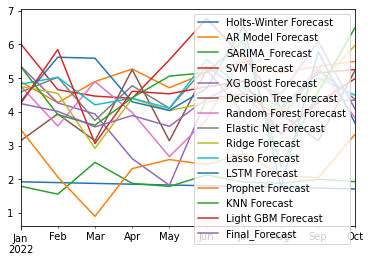

In [479]:
Final_Forecast.plot()

# **With Rolling**

In [403]:
df_new = df.drop("GDPGR", axis=1)[:-1].copy()

In [404]:
df_new["GDPGR"] = np.roll(df["GDPGR"], shift=-1)[:-1]

In [405]:
train_size = int(df.shape[0]*0.9)
test_size = int(df.shape[0]*0.95)

X_train_roll = df_new[:train_size].drop("GDPGR", axis=1)
X_test_roll = df[train_size:test_size].drop("GDPGR", axis=1)
X_val_roll = df_new[test_size:].drop("GDPGR", axis=1)

y_train_roll = df_new[:train_size]["GDPGR"]
y_test_roll = df_new[train_size:test_size]["GDPGR"]
y_val_roll = df[test_size:]["GDPGR"]

X_train_roll.shape, X_test_roll.shape, X_val_roll.shape

((182, 45), (10, 45), (10, 45))

### **Light GBM**

In [480]:
model_rlgbm = lightgbm.LGBMRegressor()

model_rlgbm.fit(X_train_roll, y_train_roll)

preds_rlgbm = model_rlgbm.predict(X_test_roll)
rmse = np.sqrt(mean_squared_error(preds_rlgbm, y_test_roll))
print(f"RMSE Score = {rmse}")

rlgbm = pd.DataFrame({'Light GBM-Rolling Forecast': preds_rlgbm[:]})
rlgbm.index = GDPGR_Forecast.index
rlgbm.head(5)

RMSE Score = 7.361360019155229


,Light GBM-Rolling Forecast
2022-01,5.360938
2022-02,3.140004
2022-03,3.915965
2022-04,3.896752
2022-05,3.121447


In [481]:
preds_rlgbm = model_rlgbm.predict(X_val_roll)
rmse = np.sqrt(mean_squared_error(preds_rlgbm, y_val_roll[:10]))
print(f"RMSE Score = {rmse}")

rlgbm = pd.DataFrame({'Light GBM-Rolling Forecast': preds_rlgbm[:10]})
rlgbm.index = GDPGR_Forecast.index
rlgbm.head(5)

RMSE Score = 5.354633330276799


,Light GBM-Rolling Forecast
2022-01,5.012472
2022-02,3.086338
2022-03,5.165823
2022-04,5.432089
2022-05,4.616096


### **LASSO REGRESSION**

In [482]:
model_las = Lasso()
model_las.fit(X_train_roll, y_train_roll)
preds_las = model_las.predict(X_test_roll)
rmse = np.sqrt(mean_squared_error(preds_las, y_test_roll))
print(f"RMSE Score = {rmse}")

rlas = pd.DataFrame({'Lasso Forecast': preds_las[:]})
rlas.index = GDPGR_Forecast.index
rlas.head(5)

RMSE Score = 7.972660360425012


,Lasso Forecast
2022-01,4.298721
2022-02,4.584481
2022-03,4.056535
2022-04,5.211601
2022-05,5.513352


In [483]:
preds_las = model_las.predict(X_val_roll)
rmse = np.sqrt(mean_squared_error(preds_las, y_val_roll[:10]))
print(f"RMSE Score = {rmse}")

rlas = pd.DataFrame({'Lasso Forecast': preds_las[:10]})
rlas.index = GDPGR_Forecast.index
rlas.head(5)

RMSE Score = 5.405190139571755


,Lasso Forecast
2022-01,4.840368
2022-02,4.487475
2022-03,5.030209
2022-04,4.868305
2022-05,4.776092


### **RIDGE REGRESSION**

In [484]:
model_ri = Ridge()
model_ri.fit(X_train_roll, y_train_roll)
preds_ri = model_ri.predict(X_test_roll)
rmse = np.sqrt(mean_squared_error(preds_ri, y_test_roll))
print(f"RMSE Score = {rmse}")

rri = pd.DataFrame({'Ridge Forecast': preds_ri[:]})
rri.index = GDPGR_Forecast.index
rri.head(5)

RMSE Score = 6.831061052449488


,Ridge Forecast
2022-01,4.936751
2022-02,-0.167826
2022-03,3.788942
2022-04,4.694191
2022-05,6.391390


In [485]:
preds_ri = model_ri.predict(X_val_roll)
rmse = np.sqrt(mean_squared_error(preds_ri, y_val_roll[:10]))
print(f"RMSE Score = {rmse}")

rri = pd.DataFrame({'Ridge Forecast': preds_ri[:10]})
rri.index = GDPGR_Forecast.index
rri.head(5)

RMSE Score = 5.543760166320266


,Ridge Forecast
2022-01,6.392519
2022-02,3.364065
2022-03,6.606238
2022-04,4.345682
2022-05,5.009699


### **KNN**

In [486]:
model_knn = KNeighborsRegressor()
model_knn.fit(X_train_roll, y_train_roll)
preds_knn = model_knn.predict(X_test_roll)
rmse = np.sqrt(mean_squared_error(preds_knn, y_test_roll))
print(f"RMSE Score = {rmse}")

rknn = pd.DataFrame({'KNN Forecast': preds_knn[:]})
rknn.index = GDPGR_Forecast.index
rknn.head(5)

RMSE Score = 7.97754990273162


,KNN Forecast
2022-01,4.605059
2022-02,5.142514
2022-03,3.320611
2022-04,6.286396
2022-05,5.227999


In [487]:
preds_knn = model_knn.predict(X_val_roll)
rmse = np.sqrt(mean_squared_error(preds_knn, y_val_roll[:10]))
print(f"RMSE Score = {rmse}")

rknn = pd.DataFrame({'KNN Forecast': preds_knn[:10]})
rknn.index = GDPGR_Forecast.index
rknn.head(5)

RMSE Score = 5.402062795857269


,KNN Forecast
2022-01,2.950931
2022-02,4.577878
2022-03,4.721047
2022-04,4.709517
2022-05,4.995690


### **Prophet Multivariate**

In [488]:
from fbprophet import Prophet

X_train_prophet = X_train_roll.copy()
X_test_prophet = X_test_roll.copy()
X_vall_prophet = X_val_roll.copy()

y_train_prophet = y_train_roll.copy()
y_test_prophet = y_test_roll.copy()
y_val_prophet = y_val_roll.copy()

X_train_prophet["ds"] = X_train_prophet.index
X_train_prophet["y"] = y_train_prophet.values


X_test_prophet["ds"] = X_test_prophet.index
X_test_prophet["y"] = y_test_prophet.values

X_val_prophet["ds"] = X_val_prophet.index
X_val_prophet["y"] = y_val_prophet.values

prophet = Prophet()

for col in X_train_prophet.columns:
    if col not in ["ds", "y"]:
        prophet.add_regressor(col)

prophet.fit(X_train_prophet)
yhat = prophet.predict(X_test_prophet)

rmse = np.sqrt(mean_squared_error(yhat.yhat, y_test_roll))
print(f"RMSE Score = {rmse}")

rprop = pd.DataFrame({'Prophet Forecast': yhat.yhat[:10]})
rprop.index = GDPGR_Forecast.index
rprop.head(5)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE Score = 6.394451973172862


,Prophet Forecast
2022-01,5.020817
2022-02,0.176028
2022-03,2.639091
2022-04,-0.456307
2022-05,4.655046


In [489]:
yhat = prophet.predict(X_test_prophet)

rmse = np.sqrt(mean_squared_error(yhat.yhat[:10], y_val_roll[:10]))
print(f"RMSE Score = {rmse}")

rprop = pd.DataFrame({'Prophet Forecast': yhat.yhat[:10]})
rprop.index = GDPGR_Forecast.index
rprop.head(5)

RMSE Score = 4.602641433803274


,Prophet Forecast
2022-01,5.020817
2022-02,0.176028
2022-03,2.639091
2022-04,-0.456307
2022-05,4.655046


### **ELASTIC NET REGRESSION**

In [490]:
from sklearn.linear_model import ElasticNet

model_en = ElasticNet()
model_en.fit(X_train_roll, y_train_roll)
preds_en = model_en.predict(X_test_roll)
rmse = np.sqrt(mean_squared_error(preds_en, y_test_roll))
print(f"RMSE Score = {rmse}")

ren = pd.DataFrame({'Elastic Net Forecast': preds_en[:]})
ren.index = GDPGR_Forecast.index
ren.head(5)

RMSE Score = 7.986830399490831


,Elastic Net Forecast
2022-01,3.020278
2022-02,4.502242
2022-03,3.922086
2022-04,5.336099
2022-05,5.977248


In [491]:
preds_en = model_en.predict(X_val_roll)
rmse = np.sqrt(mean_squared_error(preds_en[:10], y_val_roll[:10]))
print(f"RMSE Score = {rmse}")

ren = pd.DataFrame({'Elastic Net Forecast': preds_en[:10]})
ren.index = GDPGR_Forecast.index
ren.head(5)

RMSE Score = 5.497608266996225


,Elastic Net Forecast
2022-01,5.112674
2022-02,4.310898
2022-03,5.317856
2022-04,5.176539
2022-05,4.442826


### **RANDOM FOREST**

In [492]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=5000, oob_score=True, random_state=100)
model_rf.fit(X_train_roll, y_train_roll) 
preds_rf = model_rf.predict(X_test_roll)
rmse = np.sqrt(mean_squared_error(preds_rf, y_test_roll))
print(f"RMSE Score = {rmse}")

rrf = pd.DataFrame({'Random Forest Forecast': preds_rf[:]})
rrf.index = GDPGR_Forecast.index
rrf.head(5)

RMSE Score = 5.4069321459330615


,Random Forest Forecast
2022-01,5.003382
2022-02,-3.590984
2022-03,4.260855
2022-04,3.062763
2022-05,4.634055


In [493]:
preds_rf = model_rf.predict(X_val_roll)
rmse = np.sqrt(mean_squared_error(preds_rf[:10], y_val_roll[:10]))
print(f"RMSE Score = {rmse}")

rrf = pd.DataFrame({'Random Forest Forecast': preds_rf[:10]})
rrf.index = GDPGR_Forecast.index
rrf.head(5)

RMSE Score = 5.681335348604937


,Random Forest Forecast
2022-01,4.765260
2022-02,3.912577
2022-03,5.350530
2022-04,4.792719
2022-05,4.554377


### **DECISION TREE**

In [494]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
model_dt.fit(X_train_roll, y_train_roll)
preds_dt = model_dt.predict(X_test_roll)
rmse = np.sqrt(mean_squared_error(preds_dt, y_test_roll))
print(f"RMSE Score = {rmse}")

rdt = pd.DataFrame({'Decision Tree Forecast': preds_dt[:]})
rdt.index = GDPGR_Forecast.index
rdt.head(5)


RMSE Score = 8.15061585983407


,Decision Tree Forecast
2022-01,5.922588
2022-02,5.481860
2022-03,3.340265
2022-04,5.005450
2022-05,4.627535


In [495]:
preds_dt = model_dt.predict(X_val_roll)
rmse = np.sqrt(mean_squared_error(preds_dt[:10], y_val_roll[:10]))
print(f"RMSE Score = {rmse}")

rdt = pd.DataFrame({'Decision Tree Forecast': preds_dt[:10]})
rdt.index = GDPGR_Forecast.index
rdt.head(5)

RMSE Score = 5.614661710507485


,Decision Tree Forecast
2022-01,3.804148
2022-02,5.481860
2022-03,3.340265
2022-04,5.005450
2022-05,5.005450


### **XG BOOST**

In [496]:
import xgboost as xgb

model_xg = xgb.XGBRegressor(n_estimators=100,max_depth = 8, min_child_weight = 1,gamma = 1,learning_rate = 0.1) #n_estimators=500,max_depth = 10,min_child_weight = 1,gamma = 1,learning_rate = 0.1
model_xg.fit(X_train_roll, y_train_roll)
preds_xg = model_xg.predict(X_test_roll)
rmse = np.sqrt(mean_squared_error(preds_xg, y_test_roll))
print(f"RMSE Score = {rmse}")

rxg = pd.DataFrame({'XG Boost Forecast': preds_xg[:]})
rxg.index = GDPGR_Forecast.index
rxg.head(5)

[08:56:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE Score = 5.264105552921742


,XG Boost Forecast
2022-01,3.698346
2022-02,-4.830500
2022-03,3.643139
2022-04,3.822782
2022-05,4.613423


In [497]:
preds_xg = model_xg.predict(X_val_roll)
rmse = np.sqrt(mean_squared_error(preds_xg[:10], y_val_roll[:10]))
print(f"RMSE Score = {rmse}")

rxg = pd.DataFrame({'XG Boost Forecast': preds_xg[:10]})
rxg.index = GDPGR_Forecast.index
rxg.head(5)

RMSE Score = 6.036157553775732


,XG Boost Forecast
2022-01,4.958073
2022-02,3.455979
2022-03,5.180033
2022-04,5.209435
2022-05,3.345329


### **SUPPORT VECTOR MACHINE**

In [498]:
from sklearn.svm import SVR

model_svr = SVR(kernel= 'rbf')
model_svr.fit(X_train_roll, y_train_roll)
preds_svr = model_svr.predict(X_test_roll)
rmse = np.sqrt(mean_squared_error(preds_svr, y_test_roll))
print(f"RMSE Score = {rmse}")

rsvr = pd.DataFrame({'SVM Forecast': preds_svr[:]})
rsvr.index = GDPGR_Forecast.index
rsvr.head(5)


RMSE Score = 7.984237697780284


,SVM Forecast
2022-01,4.544288
2022-02,4.833358
2022-03,3.493899
2022-04,5.641251
2022-05,4.854772


In [499]:
preds_svr = model_svr.predict(X_val_roll)
rmse = np.sqrt(mean_squared_error(preds_svr[:10], y_val_roll[:10]))
print(f"RMSE Score = {rmse}")

rsvr = pd.DataFrame({'SVM Forecast': preds_svr[:10]})
rsvr.index = GDPGR_Forecast.index
rsvr.head(5)

RMSE Score = 5.380552714813514


,SVM Forecast
2022-01,5.197446
2022-02,4.205273
2022-03,4.130815
2022-04,4.436280
2022-05,5.142954


### **Deep Learning -LSTM**

In [500]:
import tensorflow as tf

BATCH_SIZE = 64
BUFFER_SIZE = 100
WINDOW_LENGTH = 24

def window_data(X, Y, window=7):
    '''
    The dataset length will be reduced to guarante all samples have the window, 
    so new length will be len(dataset)-window
    '''
    x = []
    y = []
    for i in range(window-1, len(X)):
        x.append(X[i-window+1:i+1])
        y.append(Y[i])
    return np.array(x), np.array(y)


# Since we are doing sliding, we need to join the datasets again of train and test
X_w = np.concatenate((X_train_roll, X_test_roll))
y_w = np.concatenate((y_train_roll, y_test_roll))

X_w, y_w = window_data(X_w, y_w, window=WINDOW_LENGTH)
X_train_w = X_w[:-len(X_test_roll)]
y_train_w = y_w[:-len(X_test_roll)]
X_test_w = X_w[-len(X_test_roll):]
y_test_w = y_w[-len(X_test_roll):]

# Check we will have same test set as in the previous models, make sure we didnt screw up on the windowing
print(f"Test set equal: {np.array_equal(y_test_w,y_test_roll)}")

train_data = tf.data.Dataset.from_tensor_slices((X_train_w, y_train_w))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((X_test_w, y_test_w))
val_data = val_data.batch(BATCH_SIZE).repeat()

dropout = 0.0
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        128, input_shape=X_train_w.shape[-2:], dropout=dropout),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='rmsprop', loss='mae')

EVALUATION_INTERVAL = 200
EPOCHS = 15

model_history = model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=50)  

preds_lstm = model.predict(X_test_w).reshape(1, -1)[0]
rmse = np.sqrt(mean_squared_error(preds_lstm, y_test_roll))
print(f"RMSE Score = {rmse}")

rlstm = pd.DataFrame({'LSTM Forecast': preds_lstm[:]})
rlstm.index = GDPGR_Forecast.index
rlstm.head(5)

Test set equal: True
Epoch 1/15
200/200 [==============================] - 30s 103ms/step - loss: 0.4996 - val_loss: 5.0973
Epoch 2/15
200/200 [==============================] - 18s 91ms/step - loss: 0.3001 - val_loss: 4.6826
Epoch 3/15
200/200 [==============================] - 15s 77ms/step - loss: 0.2590 - val_loss: 4.7213
Epoch 4/15
200/200 [==============================] - 16s 79ms/step - loss: 0.2372 - val_loss: 4.9579
Epoch 5/15
200/200 [==============================] - 16s 79ms/step - loss: 0.2235 - val_loss: 5.1757
Epoch 6/15
200/200 [==============================] - 16s 79ms/step - loss: 0.2127 - val_loss: 5.1599
Epoch 7/15
200/200 [==============================] - 15s 77ms/step - loss: 0.1991 - val_loss: 4.9177
Epoch 8/15
200/200 [==============================] - 20s 102ms/step - loss: 0.1865 - val_loss: 5.2157
Epoch 9/15
200/200 [==============================] - 18s 91ms/step - loss: 0.1792 - val_loss: 5.3335
Epoch 10/15
200/200 [==============================] - 18s 

,LSTM Forecast
2022-01,4.551820
2022-02,3.201563
2022-03,4.554175
2022-04,4.953288
2022-05,7.368247


In [501]:
import tensorflow as tf

BATCH_SIZE = 64
BUFFER_SIZE = 100
WINDOW_LENGTH = 24

def window_data(X, Y, window=7):
    '''
    The dataset length will be reduced to guarante all samples have the window, 
    so new length will be len(dataset)-window
    '''
    x = []
    y = []
    for i in range(window-1, len(X)):
        x.append(X[i-window+1:i+1])
        y.append(Y[i])
    return np.array(x), np.array(y)


# Since we are doing sliding, we need to join the datasets again of train and test
X_w = np.concatenate((X_train_roll, X_val_roll))
y_w = np.concatenate((y_train_roll, y_val_roll))

X_w, y_w = window_data(X_w, y_w, window=WINDOW_LENGTH)
X_train_w = X_w[:-len(X_val_roll)]
y_train_w = y_w[:-len(X_val_roll)]
X_test_w = X_w[-len(X_val_roll):]
y_test_w = y_w[-len(X_val_roll):]

# Check we will have same test set as in the previous models, make sure we didnt screw up on the windowing
print(f"Test set equal: {np.array_equal(y_test_w,y_val_roll)}")

train_data = tf.data.Dataset.from_tensor_slices((X_train_w, y_train_w))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((X_test_w, y_test_w))
val_data = val_data.batch(BATCH_SIZE).repeat()

dropout = 0.0
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        128, input_shape=X_train_w.shape[-2:], dropout=dropout),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='rmsprop', loss='mae')

EVALUATION_INTERVAL = 200
EPOCHS = 15

model_history = model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=50)  

preds_lstm = model.predict(X_test_w).reshape(1, -1)[0]
rmse = np.sqrt(mean_squared_error(preds_lstm[:10], y_val_roll[:10]))
print(f"RMSE Score = {rmse}")

rlstm = pd.DataFrame({'LSTM Forecast': preds_lstm[:10]})
rlstm.index = GDPGR_Forecast.index
rlstm.head(5)

Test set equal: False
Epoch 1/15
200/200 [==============================] - 25s 94ms/step - loss: 0.5043 - val_loss: 3.9415
Epoch 2/15
200/200 [==============================] - 17s 87ms/step - loss: 0.3145 - val_loss: 3.4050
Epoch 3/15
200/200 [==============================] - 19s 94ms/step - loss: 0.2710 - val_loss: 3.6219
Epoch 4/15
200/200 [==============================] - 15s 75ms/step - loss: 0.2365 - val_loss: 3.6533
Epoch 5/15
200/200 [==============================] - 16s 78ms/step - loss: 0.2156 - val_loss: 3.5236
Epoch 6/15
200/200 [==============================] - 17s 83ms/step - loss: 0.2057 - val_loss: 3.5221
Epoch 7/15
200/200 [==============================] - 15s 77ms/step - loss: 0.1947 - val_loss: 3.4929
Epoch 8/15
200/200 [==============================] - 15s 77ms/step - loss: 0.1825 - val_loss: 3.7242
Epoch 9/15
200/200 [==============================] - 19s 94ms/step - loss: 0.1733 - val_loss: 3.9156
Epoch 10/15
200/200 [==============================] - 18s 8

,LSTM Forecast
2022-01,3.900601
2022-02,2.225707
2022-03,1.041665
2022-04,2.838463
2022-05,1.345488


### **COMBINE ALL FORECAST**

In [502]:
rFinal_Forecast = pd.concat([GDPGR_Forecast,ar,SARIMA_Forecast,rsvr, rxg, rdt, rrf,ren, rri, rlas, rlstm, rprop, rknn, rlgbm],1)
rFinal_Forecast['Final_Forecast'] = Final_Forecast.mean(axis=1)
rFinal_Forecast.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


,Holts-Winter Forecast,AR Model Forecast,SARIMA_Forecast,SVM Forecast,XG Boost Forecast,Decision Tree Forecast,Random Forest Forecast,Elastic Net Forecast,Ridge Forecast,Lasso Forecast,LSTM Forecast,Prophet Forecast,KNN Forecast,Light GBM-Rolling Forecast,Final_Forecast
2022-01,1.923483,4.894025,1.792571,5.197446,4.958073,3.804148,4.765260,5.112674,6.392519,4.840368,3.900601,5.020817,2.950931,5.012472,4.245713
2022-02,1.899956,4.270126,1.556696,4.205273,3.455979,5.481860,3.912577,4.310898,3.364065,4.487475,2.225707,0.176028,4.577878,3.086338,4.015864
2022-03,1.876429,4.898054,2.500170,4.130815,5.180033,3.340265,5.350530,5.317856,6.606238,5.030209,1.041665,2.639091,4.721047,5.165823,3.552514
2022-04,1.852902,5.269738,1.877917,4.436280,5.209435,5.005450,4.792719,5.176539,4.345682,4.868305,2.838463,-0.456307,4.709517,5.432089,3.889789
2022-05,1.829375,4.714231,1.784984,5.142954,3.345329,5.005450,4.554377,4.442826,5.009699,4.776092,1.345488,4.655046,4.995690,4.616096,3.569144


In [429]:
from google.colab import files
rFinal_Forecast.to_csv('final_rollingforecast.csv') 
files.download('final_rollingforecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

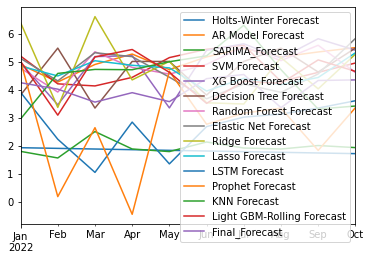

In [503]:
rFinal_Forecast.plot()